# Cosine similarity

## import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## import dataset

In [2]:
#from the scikit library we import a simple dataset with some data about three types of iris flowers:
#iris-Setosa, iris-versicolour, iris-virginica
#the data is stored as a bunch!
dataset = load_iris()

#Retrieve only the data part and convert it to a dataframe
X = pd.DataFrame(dataset.data)

#The dataset does not contain headers, so we'll add those
X.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']

#Create the set with the targets
y = dataset.target

#print the first 5 rows
print(X.head())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


## Pairwise cosine similarity

In [3]:
#This function computes all cosine similarities between each observation in X
cos_sim = cosine_similarity(X)

#Similarly you could also compute it manually using numpy
#take the first 2 observations and compute the cosine similarity between the 2
x1 = X.iloc[0]
x2 = X.iloc[1]

#Derive the dot product of the vectors and normalize them
dot = np.dot(x1,x2)
norm_x1 = np.linalg.norm(x1)
norm_x2 = np.linalg.norm(x2)

#determine cosine similarity
cos_sim_manual = dot / (norm_x1 * norm_x2)

print("similarity between first 2 observations using sklearn:", cos_sim[0,1])
print("similarity between first 2 observations using numpy:", cos_sim_manual)


similarity between first 2 observations using sklearn: 0.9985791635040219
similarity between first 2 observations using numpy: 0.9985791635040219


## visualising

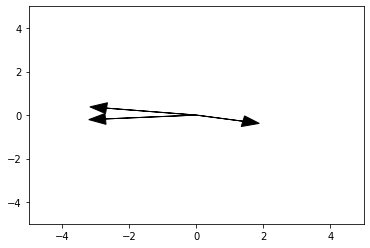

In [4]:
#Since we are dealing with 4 dimensional vectors we first reduce the dimension to 2 using PCA
pca = PCA(n_components = 2).fit(X)
pca_2d = pca.transform(X)

x1 = pca_2d[0]
x2 = pca_2d[1]
x3 = pca_2d[149]

#Plot the 2d vectors, vector x1 and x2 are very similiar
ax = plt.axes(xlim=(-5, 5), ylim=(-5, 5))
ax.arrow(0,0, x1[0], x1[1], head_width=0.5, head_length=0.5, fc='k', ec='k')
ax.arrow(0,0, x2[0], x2[1], head_width=0.5, head_length=0.5, fc='k', ec='k')
ax.arrow(0,0, x3[0], x3[1], head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.show()